In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense
from sklearn.neighbors import KNeighborsClassifier
import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['proj.ipynb', 'heart.csv', 'README.md', '.ipynb_checkpoints']


In [2]:
dataset = pd.read_csv("heart.csv")

In [3]:
dataset.shape

(303, 14)

In [4]:
dataset.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [5]:
dataset.sample(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
105,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0


In [6]:
dataset.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:>

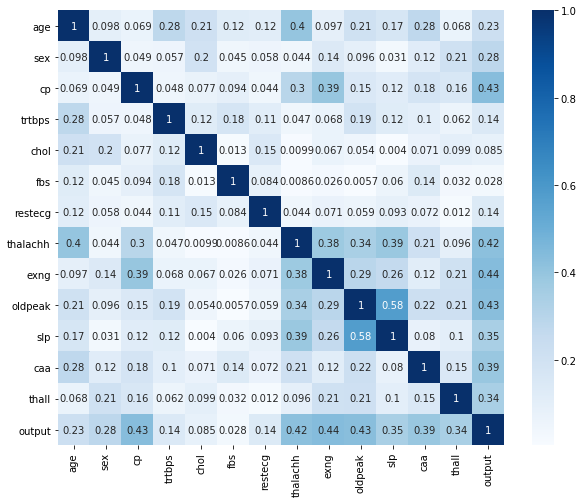

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr().abs(), annot = True, cmap='Blues')

In [8]:
dataset["output"].unique()

array([1, 0])

In [9]:
print(dataset.corr()["output"].abs().sort_values(ascending=True))

fbs         0.028046
chol        0.085239
restecg     0.137230
trtbps      0.144931
age         0.225439
sex         0.280937
thall       0.344029
slp         0.345877
caa         0.391724
thalachh    0.421741
oldpeak     0.430696
cp          0.433798
exng        0.436757
output      1.000000
Name: output, dtype: float64


1    165
0    138
Name: output, dtype: int64


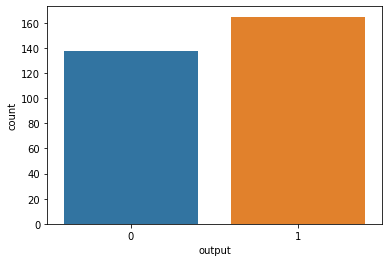

In [10]:
y = dataset["output"]

sns.countplot(y)


target_temp = dataset.output.value_counts()

print(target_temp)

In [11]:
countWithoutProblems = len(dataset[dataset.output == 0])
countWithProblems = len(dataset[dataset.output == 1])

print("Percentage of patients WITH heart problems: "+str(round(countWithProblems*100)/303))
print("Percentage of patients WITHOUT heart problems: "+str(round(countWithoutProblems*100)/303))

Percentage of patients WITH heart problems: 54.45544554455446
Percentage of patients WITHOUT heart problems: 45.54455445544554


In [12]:
dataset["age"].unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77])

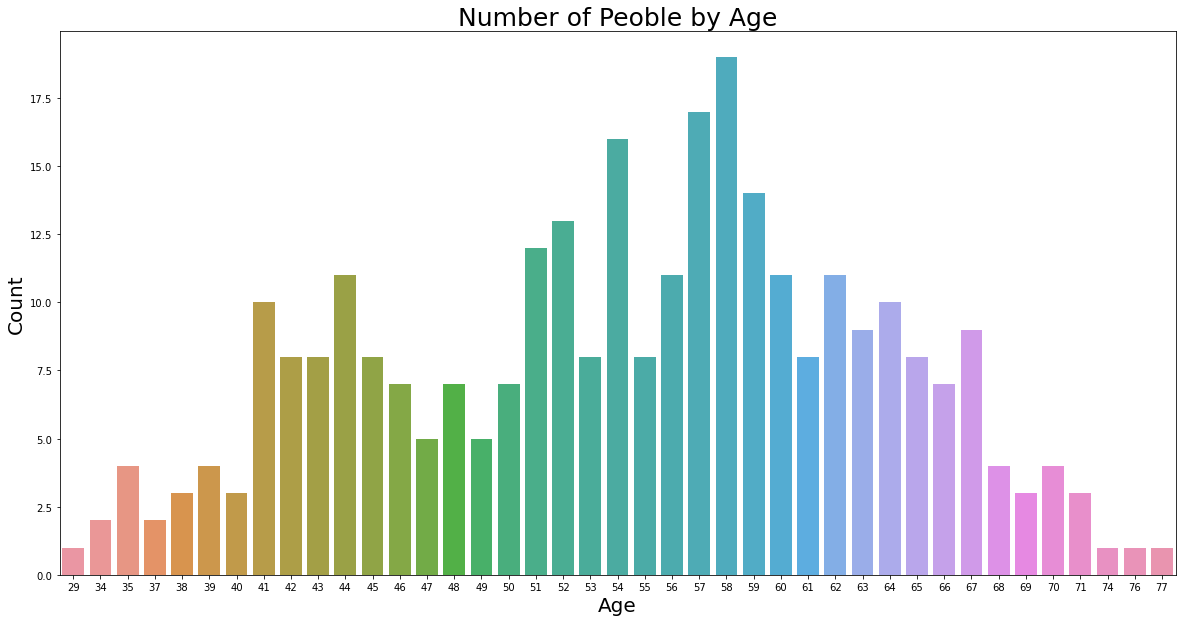

In [13]:
plt.figure(figsize=(20,10))
sns.countplot(x ='age', data = dataset)
plt.title('Number of Peoble by Age', fontsize = 25)
plt.xlabel('Age',fontsize = 20 )
plt.ylabel('Count',fontsize = 20 )
plt.show()

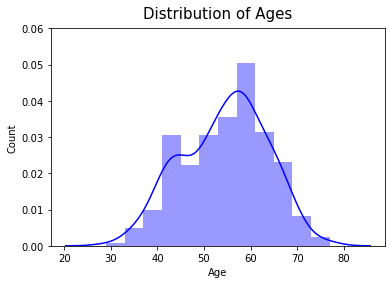

In [14]:
sns.distplot(dataset['age'], color='blue')
plt.ylim(0, 0.06)
plt.title('Distribution of Ages', fontsize=15, pad = 10)
plt.xlabel('Age', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()

In [15]:
dataset["sex"].unique()

array([1, 0])

<AxesSubplot:xlabel='sex', ylabel='count'>

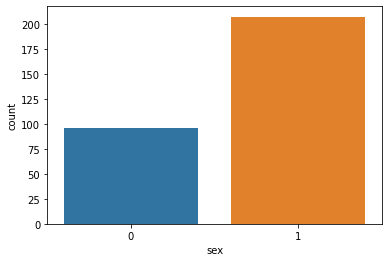

In [16]:
sns.countplot(x = "sex", data = dataset)

In [17]:
target_sex = dataset.sex.value_counts()

print(target_sex)

1    207
0     96
Name: sex, dtype: int64


In [18]:
dataset["cp"].unique()

array([3, 2, 1, 0])

<AxesSubplot:xlabel='cp', ylabel='count'>

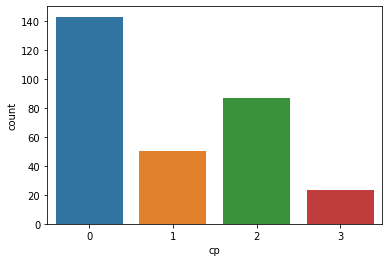

In [19]:
sns.countplot(x = "cp", data = dataset)

In [20]:
target_cp = dataset.cp.value_counts()

print(target_cp)

0    143
2     87
1     50
3     23
Name: cp, dtype: int64


In [21]:
dataset["fbs"].unique()

array([1, 0])

<AxesSubplot:xlabel='fbs', ylabel='count'>

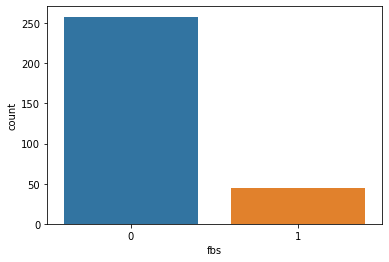

In [22]:
sns.countplot(x = "fbs", data = dataset)

In [23]:
target_fbs = dataset.fbs.value_counts()

print(target_fbs)

0    258
1     45
Name: fbs, dtype: int64


In [24]:
dataset["restecg"].unique()

array([0, 1, 2])

<AxesSubplot:xlabel='restecg', ylabel='count'>

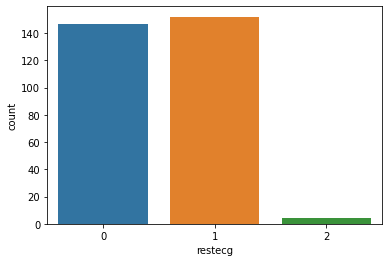

In [25]:
sns.countplot(x = "restecg", data = dataset)

In [26]:
target_ecg = dataset.restecg.value_counts()

print(target_ecg)

1    152
0    147
2      4
Name: restecg, dtype: int64


In [27]:
dataset["exng"].unique()

array([0, 1])

<AxesSubplot:xlabel='exng', ylabel='count'>

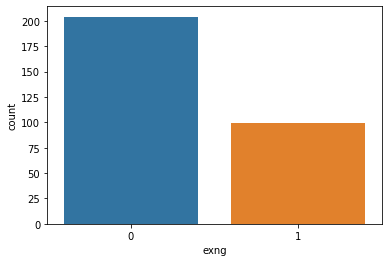

In [28]:
sns.countplot(x = "exng", data = dataset)

In [29]:
dataset["caa"].unique()

array([0, 2, 1, 3, 4])

<AxesSubplot:xlabel='caa', ylabel='count'>

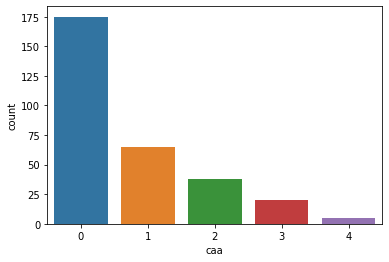

In [30]:
sns.countplot(dataset["caa"])

In [31]:
dataset["slp"].unique()

array([0, 2, 1])

<AxesSubplot:xlabel='slp', ylabel='count'>

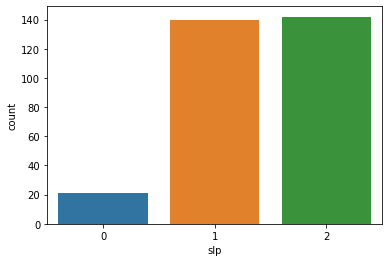

In [32]:
sns.countplot(x = "slp", data = dataset)

In [33]:
target_slp = dataset.slp.value_counts()

print(target_slp)

2    142
1    140
0     21
Name: slp, dtype: int64


In [34]:
dataset["thall"].unique()

array([1, 2, 3, 0])

<AxesSubplot:xlabel='thall', ylabel='count'>

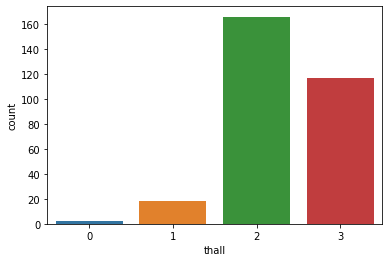

In [35]:
sns.countplot(x = "thall", data = dataset)

In [36]:
target_thall = dataset.thall.value_counts()

print(target_thall)

2    166
3    117
1     18
0      2
Name: thall, dtype: int64


<AxesSubplot:xlabel='trtbps', ylabel='count'>

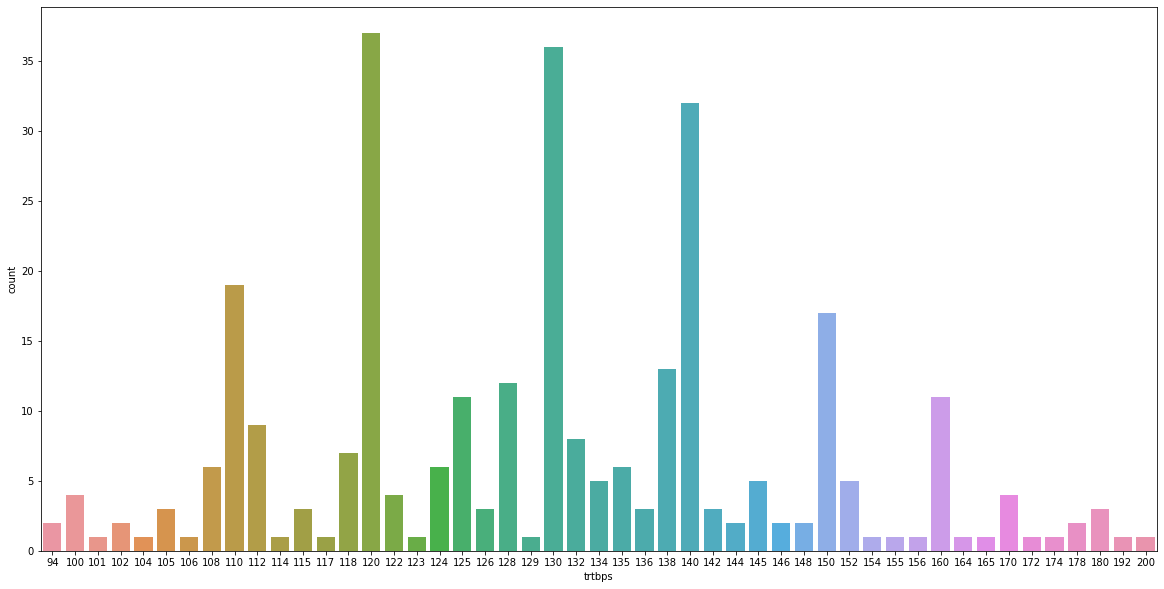

In [37]:
plt.figure(figsize=(20,10))
sns.countplot(x = "trtbps", data = dataset)

<AxesSubplot:xlabel='chol', ylabel='count'>

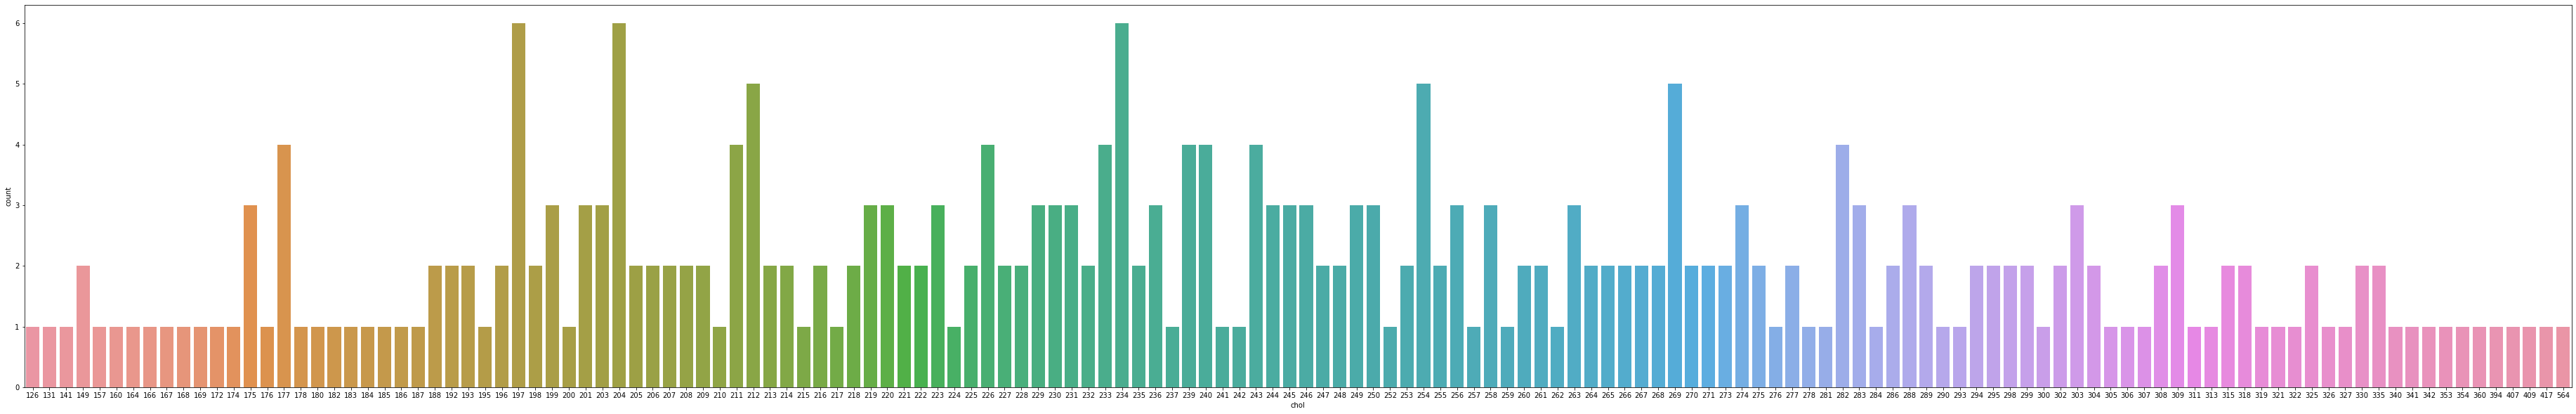

In [38]:
plt.figure(figsize=(65,10))
sns.countplot(x = "chol", data = dataset)

<AxesSubplot:xlabel='thalachh', ylabel='count'>

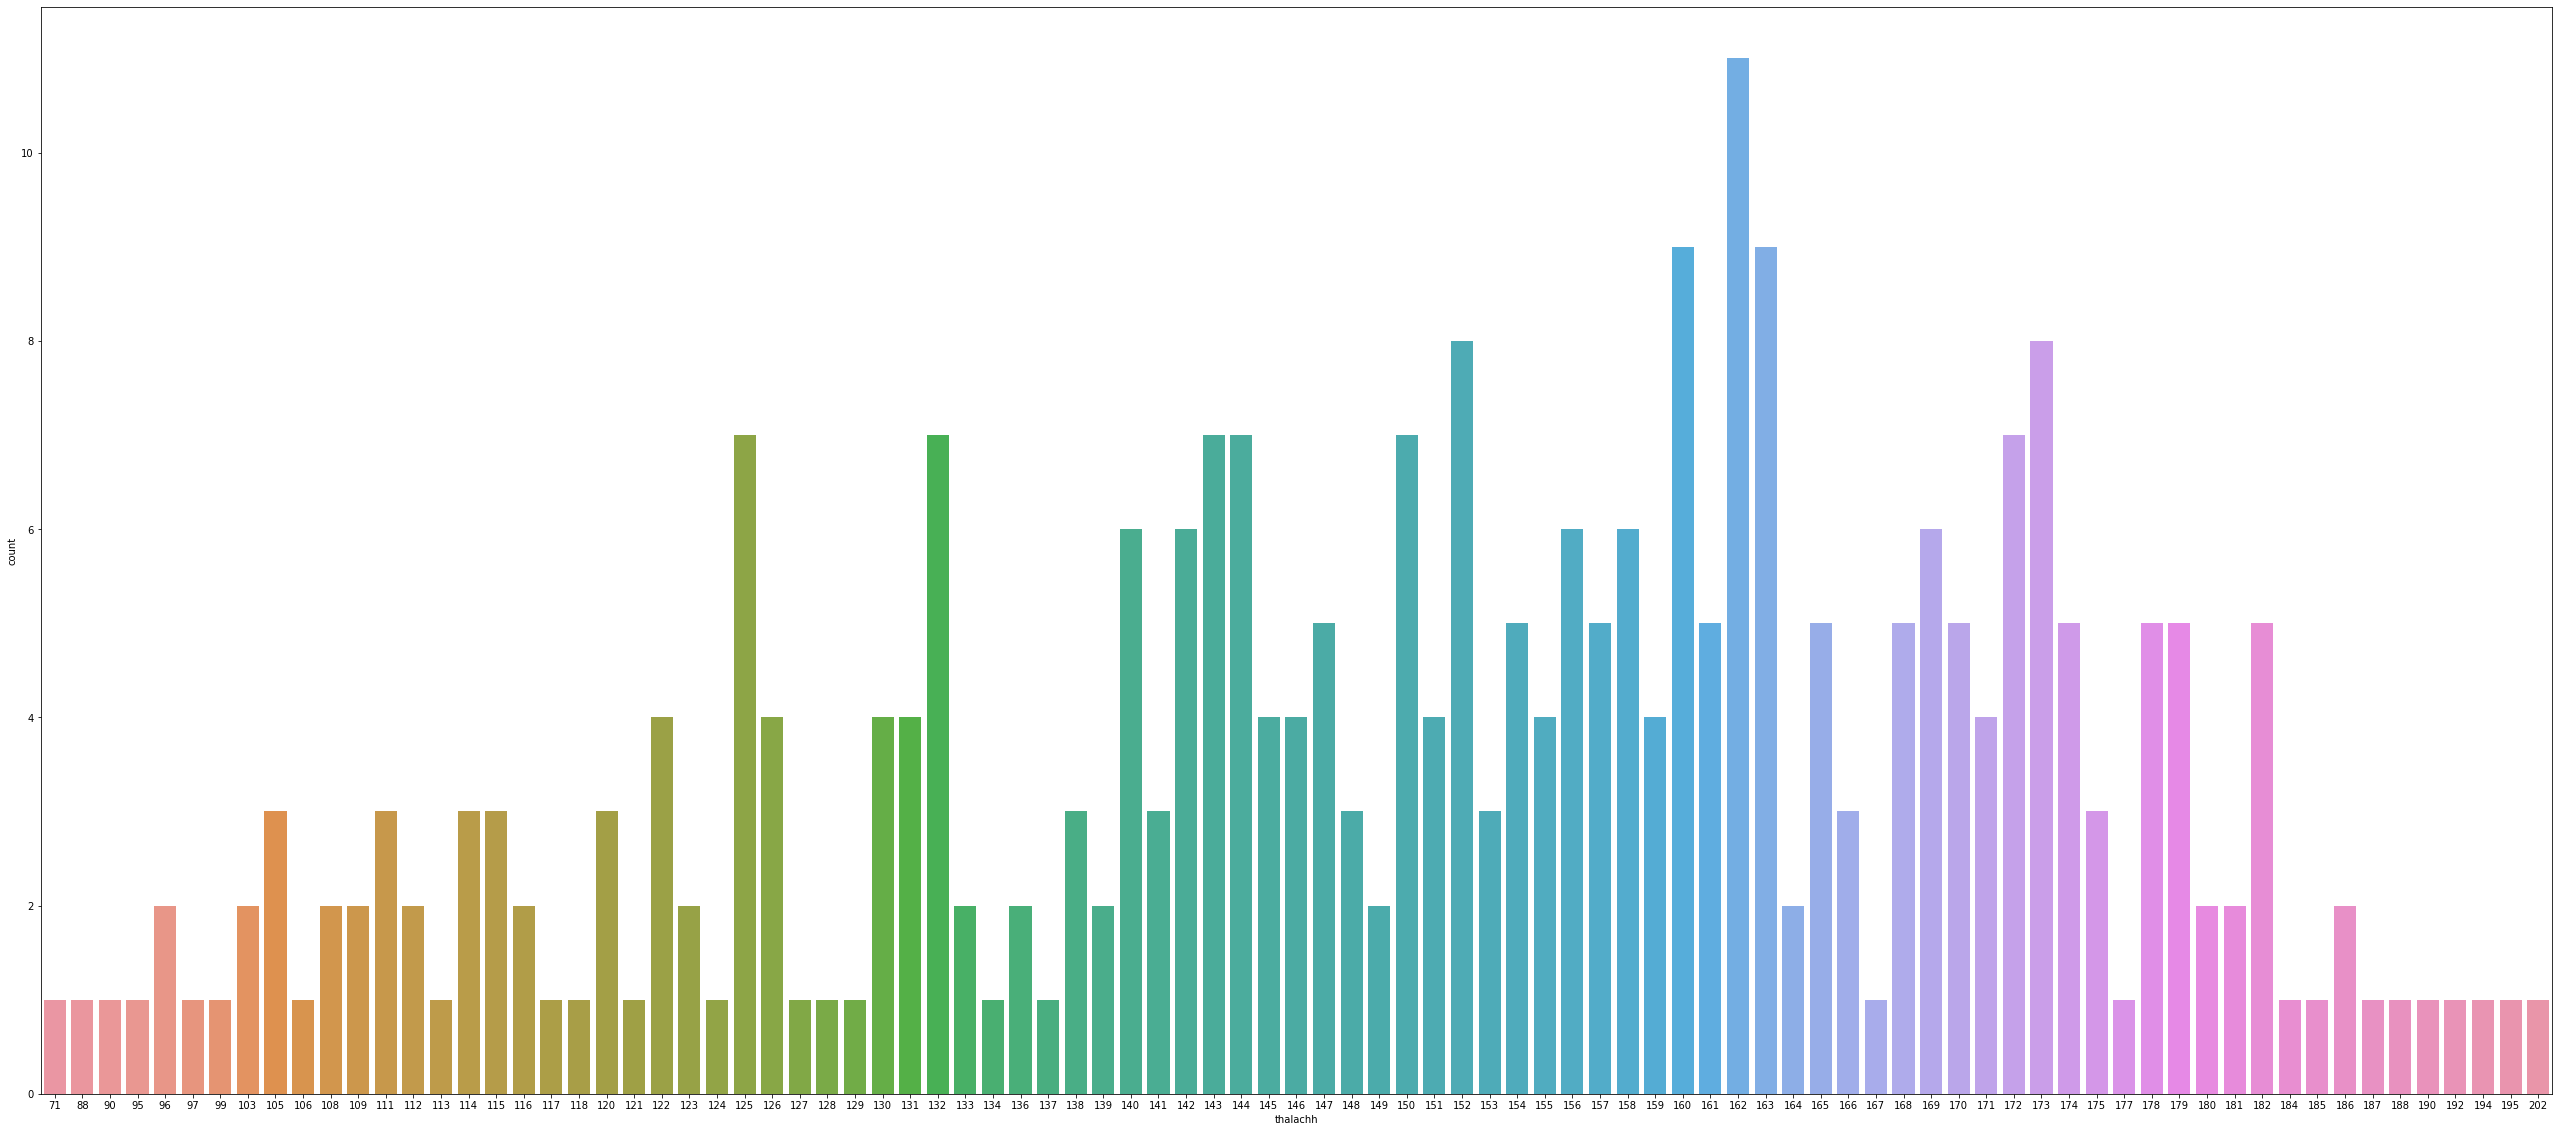

In [39]:
plt.figure(figsize=(45,20))
sns.countplot(x = "thalachh", data = dataset)

<AxesSubplot:xlabel='oldpeak', ylabel='count'>

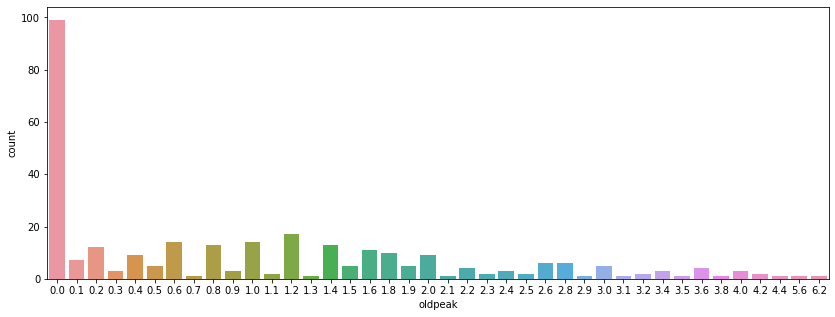

In [40]:
plt.figure(figsize=(14,5))
sns.countplot(x = "oldpeak", data = dataset)

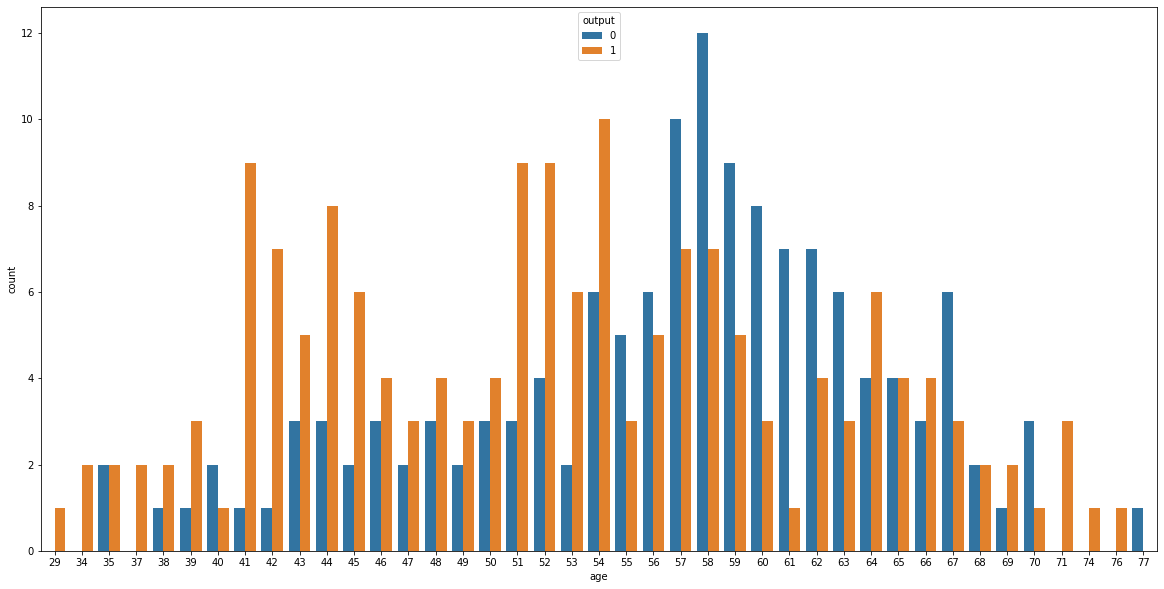

In [41]:
plt.figure(figsize=(20,10))
sns.countplot(x = dataset['age'],hue = dataset['output']);

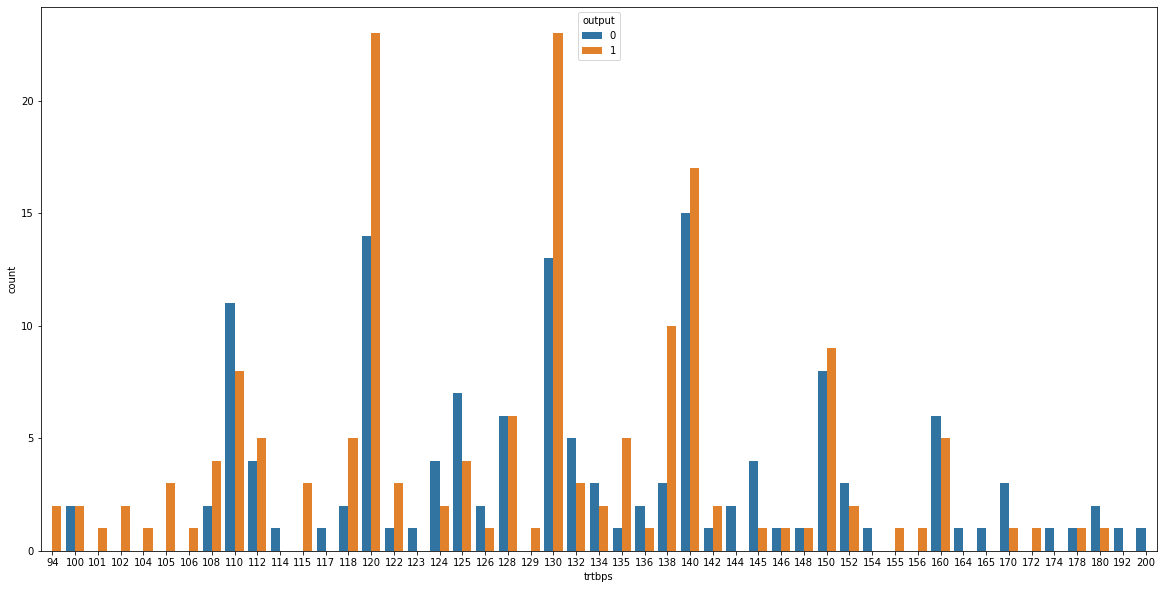

In [42]:
plt.figure(figsize=(20,10))
sns.countplot(x = dataset['trtbps'],hue = dataset['output']);

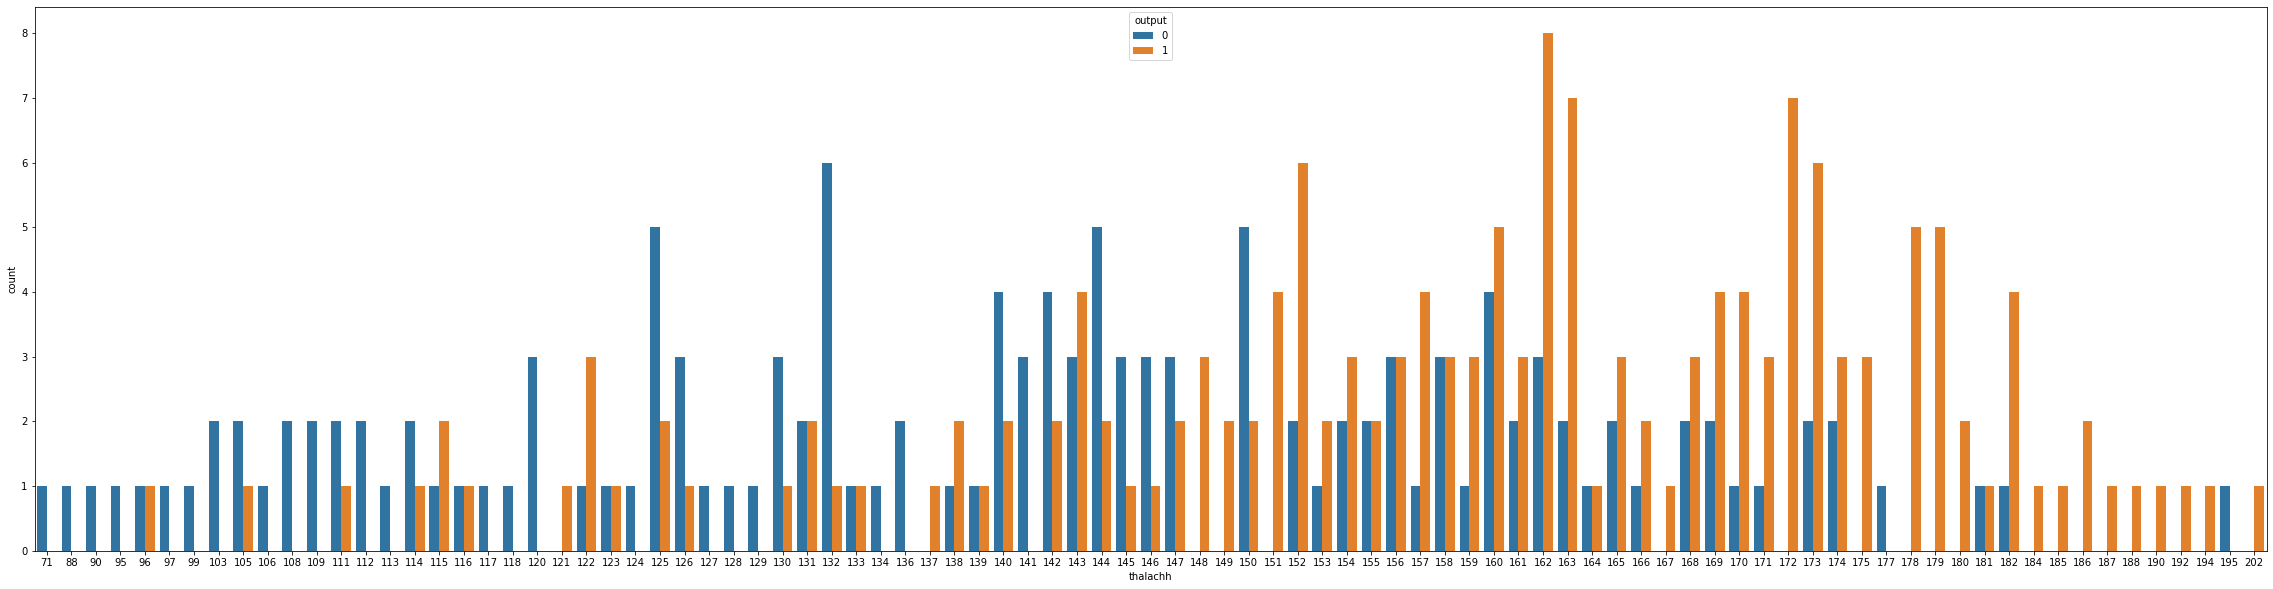

In [43]:
plt.figure(figsize=(40,10))
sns.countplot(x = dataset["thalachh"],hue = dataset['output']);

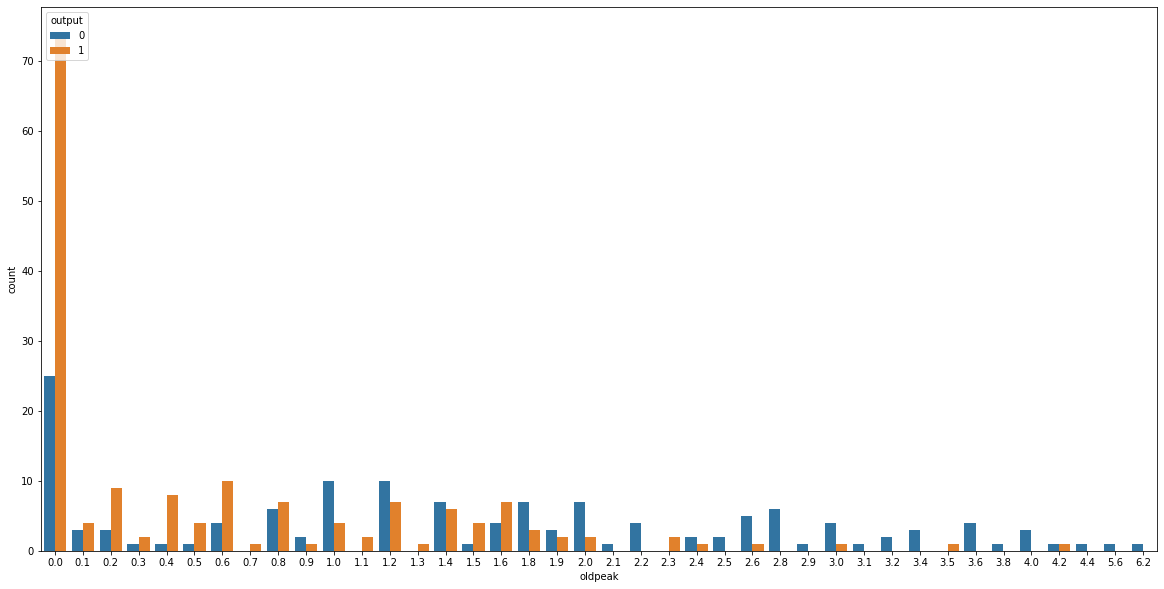

In [44]:
plt.figure(figsize=(20,10))
sns.countplot(x = dataset["oldpeak"],hue = dataset['output']);

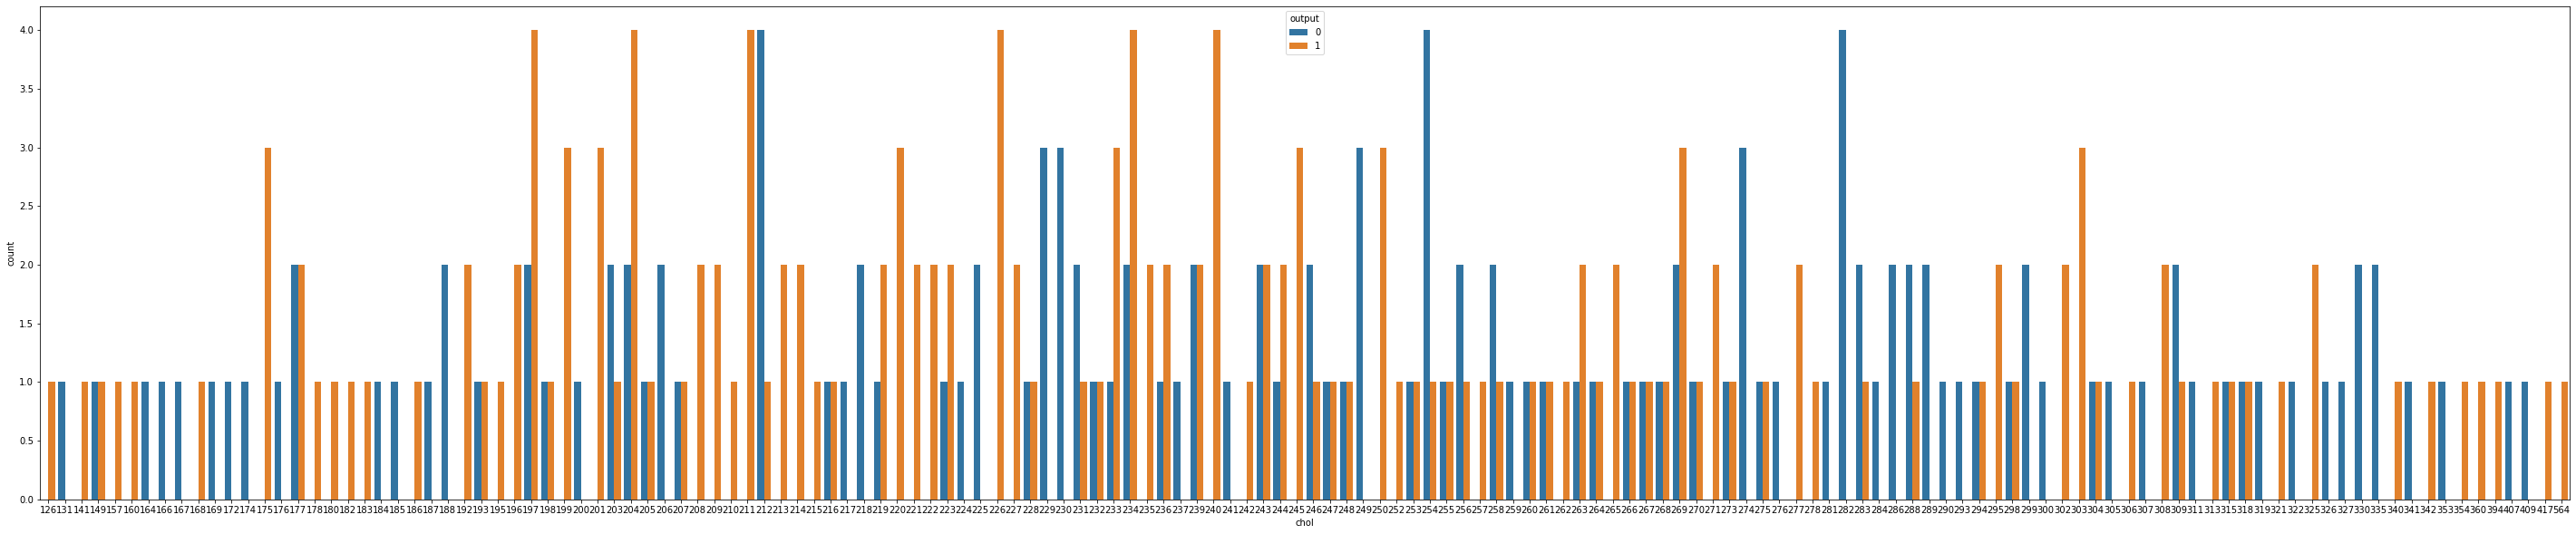

In [45]:
plt.figure(figsize=(50,10))
sns.countplot(x = dataset["chol"],hue = dataset['output']);

In [46]:
disease = ["age","sex","cp","fbs","restecg","exng","slp","caa","thall"]
list(enumerate(disease))

[(0, 'age'),
 (1, 'sex'),
 (2, 'cp'),
 (3, 'fbs'),
 (4, 'restecg'),
 (5, 'exng'),
 (6, 'slp'),
 (7, 'caa'),
 (8, 'thall')]

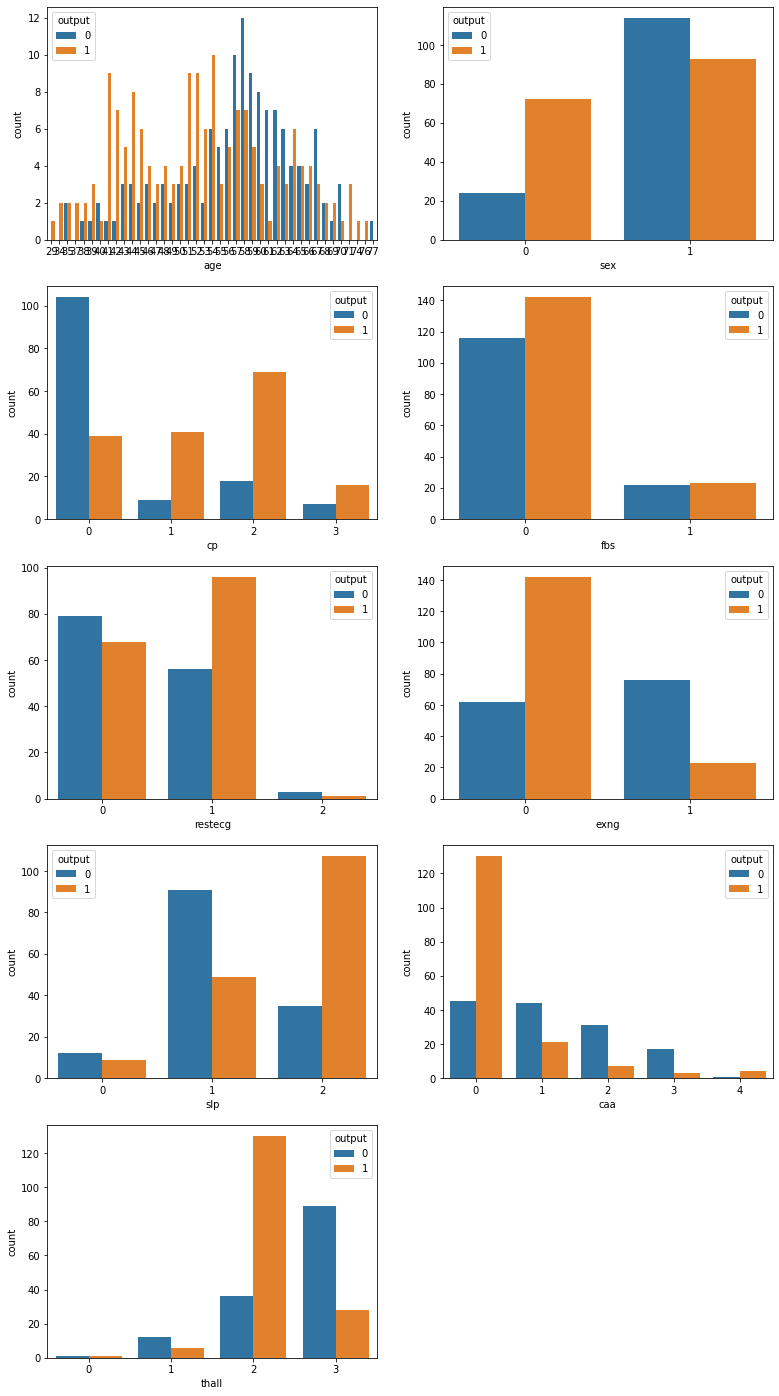

In [47]:
plt.figure(figsize = (13,30))
for i in enumerate(disease):
    plt.subplot(6,2,i[0]+1)
    sns.countplot(x=i[1], hue = "output",data =dataset)
    
plt.show()

In [175]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("output",axis=1)

target = dataset["output"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.25,random_state=0)

In [176]:
X_train.shape

(227, 13)

In [177]:
X_test.shape

(76, 13)

In [132]:
Y_train.shape

(227,)

In [133]:
Y_test.shape

(76,)

In [134]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [135]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [136]:
lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [137]:
Y_pred_lr.shape

(76,)

In [138]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy achieved using Logistic Regression is: 84.21 %


In [139]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [140]:
Y_pred_nb.shape

(76,)

In [141]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy achieved using Naive Bayes is: 81.58 %


In [142]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [143]:
Y_pred_svm.shape

(76,)

In [144]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy achieved using Linear SVM is: 84.21 %


In [145]:
score_list=[]

for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(X_train, Y_train)
    predictions = knn2.predict(X_test)
    score_list.append(accuracy_score(predictions, Y_test))

Text(0, 0.5, 'Score')

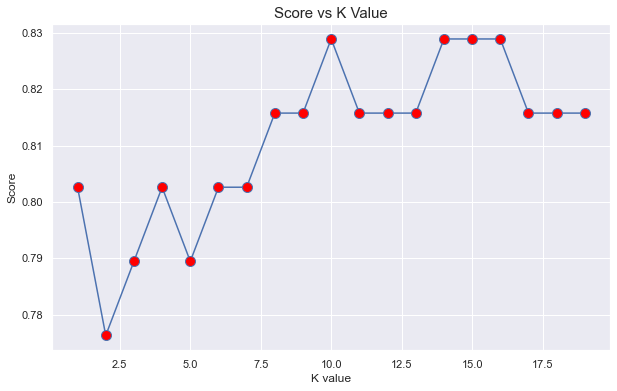

In [146]:
plt.figure(figsize =(10, 6))
plt.plot(range(1, 20), score_list, marker ='o', markerfacecolor ='red', markersize = 10)
  
plt.title('Score vs K Value', size=15)
plt.xlabel('K value')
plt.ylabel('Score')

In [147]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [148]:
Y_pred_knn.shape

(76,)

In [149]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy achieved using KNN is: "+str(score_knn)+" %")

The accuracy achieved using KNN is: 80.26 %


In [150]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0

for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [151]:
print(Y_pred_dt.shape)

(76,)


In [152]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy achieved using Decision Tree is: 80.26 %


In [153]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [154]:
Y_pred_rf.shape

(76,)

In [156]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy achieved using Decision Tree is: 88.16 %


In [157]:
from keras.models import Sequential
from keras.layers import Dense

from keras import callbacks

In [174]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [159]:
model.fit(X_train,Y_train,epochs=250)

Epoch 1/250
8/8 [==============================] - 1s 3ms/step - loss: 0.8159 - accuracy: 0.5242
Epoch 2/250
8/8 [==============================] - 0s 2ms/step - loss: 0.7932 - accuracy: 0.5507
Epoch 3/250
8/8 [==============================] - 0s 2ms/step - loss: 0.7722 - accuracy: 0.5683
Epoch 4/250
8/8 [==============================] - 0s 2ms/step - loss: 0.7532 - accuracy: 0.5683
Epoch 5/250
8/8 [==============================] - 0s 2ms/step - loss: 0.7350 - accuracy: 0.5683
Epoch 6/250
8/8 [==============================] - 0s 2ms/step - loss: 0.7185 - accuracy: 0.5859
Epoch 7/250
8/8 [==============================] - 0s 2ms/step - loss: 0.7040 - accuracy: 0.5903
Epoch 8/250
8/8 [==============================] - 0s 2ms/step - loss: 0.6902 - accuracy: 0.5903
Epoch 9/250
8/8 [==============================] - 0s 3ms/step - loss: 0.6777 - accuracy: 0.6035
Epoch 10/250
8/8 [==============================] - 0s 2ms/step - loss: 0.6648 - accuracy: 0.6256
Epoch 11/250
8/8 [===========

In [160]:
Y_pred_nn = model.predict(X_test)

In [161]:
Y_pred_nn.shape

(76, 1)

In [162]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [163]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy achieved using Neural Network is: "+str(score_nn)+" %")

The accuracy achieved using Neural Network is: 86.84 %


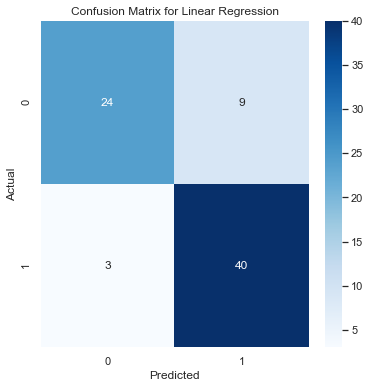

In [164]:
conf_mat1=confusion_matrix(Y_test,Y_pred_lr)
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat1,annot=True,fmt=".0f",cmap="Blues")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix for Linear Regression")
plt.show()

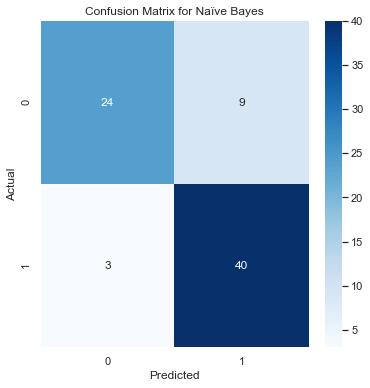

In [165]:
conf_mat2=confusion_matrix(Y_test,Y_pred_nb)
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat1,annot=True,fmt=".0f",cmap="Blues")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix for Naïve Bayes")
plt.show()

In [1]:
conf_mat2=confusion_matrix(Y_test,Y_pred_svm)
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat,annot=True,fmt=".0f",cmap="Blues")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix for SVM")
plt.show()

NameError: name 'confusion_matrix' is not defined

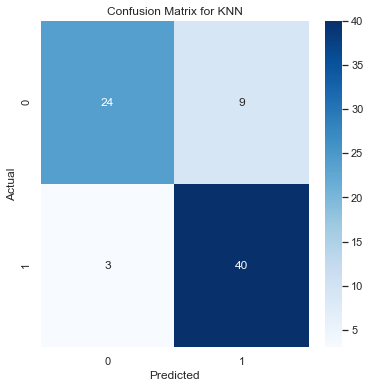

In [167]:
conf_mat2=confusion_matrix(Y_test,Y_pred_knn)
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat1,annot=True,fmt=".0f",cmap="Blues")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix for KNN")
plt.show()

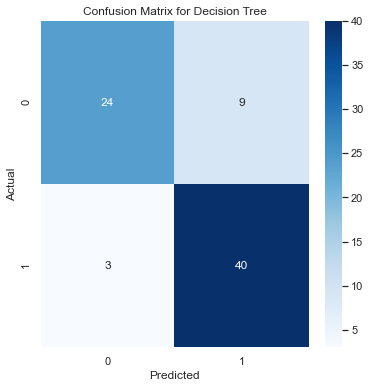

In [168]:
conf_mat2=confusion_matrix(Y_test,Y_pred_dt)
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat1,annot=True,fmt=".0f",cmap="Blues")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix for Decision Tree")
plt.show()

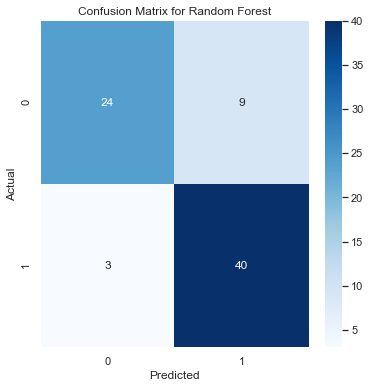

In [169]:
conf_mat2=confusion_matrix(Y_test,Y_pred_rf)
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat1,annot=True,fmt=".0f",cmap="Blues")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix for Random Forest")
plt.show()

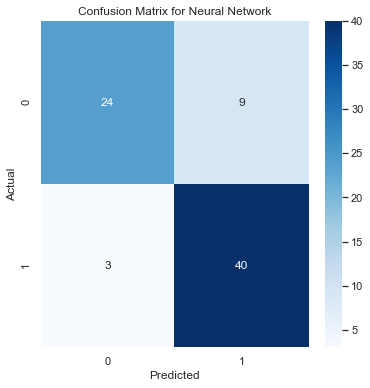

In [170]:
conf_mat2=confusion_matrix(Y_test,Y_pred_nn)
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat1,annot=True,fmt=".0f",cmap="Blues")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix for Neural Network")
plt.show()

In [171]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_nn]
algorithms = ["Logistic Regression", "Naïve Bayes", "SVM", "K-Nearest Neighbours", "Decision Tree", "Random Forest", "Neural Network"]    

for i in range(len(algorithms)):
    print("The accuracy achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy achieved using Logistic Regression is: 84.21 %
The accuracy achieved using Naïve Bayes is: 81.58 %
The accuracy achieved using SVM is: 84.21 %
The accuracy achieved using K-Nearest Neighbours is: 80.26 %
The accuracy achieved using Decision Tree is: 80.26 %
The accuracy achieved using Random Forest is: 88.16 %
The accuracy achieved using Neural Network is: 86.84 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy'>

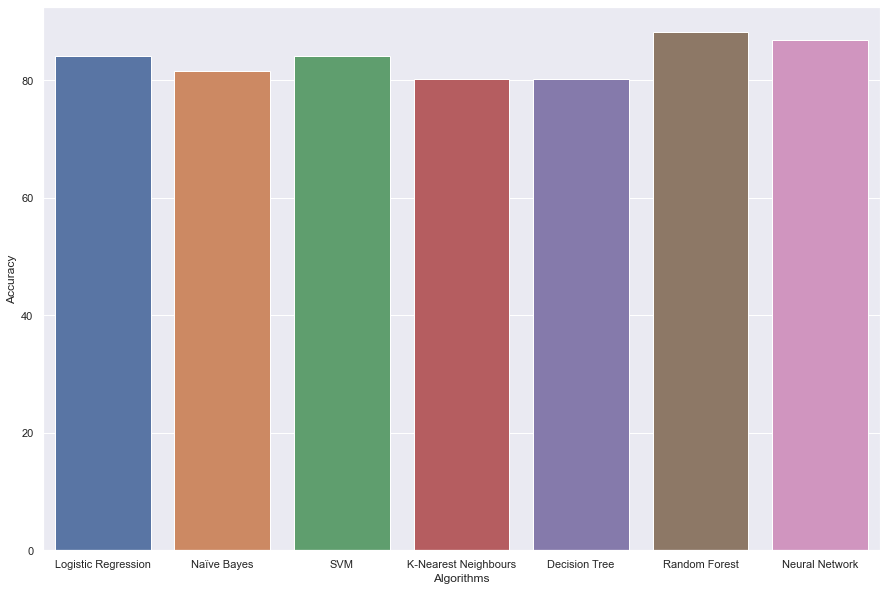

In [172]:
sns.set(rc={'figure.figsize':(15,10)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")

sns.barplot(algorithms,scores)